In [1]:
# Importando as bibliotecas necessárias para acesso ao SGBDR MYSQL e ao trabalho com DataFrame
import pandas as pd
import pymysql

## NORMALIZAR O NOME DO ARQUIVO E O NOME DOS CAMPOS NO DATAFRAME

In [2]:
# Criando DataFrame com dados de planilha do excel
df = pd .read_excel('./dataset/covid_vacinacao.xlsx')
df.head(3)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
# Listando colunas existentes no DataFrame df
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
  

In [4]:
# Normalizando os nomes das colunas do DataFrame usando o método replace() e lower()
# Para isso usaremos list comphreension
df.columns = [x.lower().replace(" ","_").replace("?","") \
                    .replace("-","_").replace(r"/","_").replace("\\","_").replace(r"%","") \
                    .replace(")","").replace(r"(","").replace("?","").replace("$","") for x in df.columns]

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
  

In [5]:
# Exibindo os dois primeiro registros do DataFrame df
df.head(2)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37746.0,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# Exibindo o tipo de dados dos campos do DataFrame df
df.dtypes

iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_tests                                          float64
new_tests                                            float64
total_tests_per_thousand                             float64
new_tests_per_thousand                               float64
new_tests_smoothed                                   float64
new_tests_smoothed_per_thousand                      float64
positive_rate                                        float64
tests_per_case                                       float64
tests_units                                           object
total_vaccinations                                   float64
people_vaccinated                                    float64
people_fully_vaccinated                              float64
total_boosters          

In [7]:
# Lista o total de registros do DataFrame df
len(df.columns)

45

In [8]:
# Variável - substituicoes, mapeia o tipo de dados do DataFrame df para o tipo de dados do SGBDR MYSQL
substituicoes = {
    'object': 'varchar',
    'float64': 'float',
    'int64': 'int',
    'datetime64': 'timestamp',
    'timedelta64[ns]': 'varchar'    
}

substituicoes

{'object': 'varchar',
 'float64': 'float',
 'int64': 'int',
 'datetime64': 'timestamp',
 'timedelta64[ns]': 'varchar'}

In [9]:
# Mapeando data type df para data type Mysql
col_string = ", ".join("{} {}".format(n, d) for (n, d) in zip(df.columns, df.dtypes.replace(substituicoes)))
col_string

'iso_code varchar, continent varchar, location varchar, date datetime64[ns], total_tests float, new_tests float, total_tests_per_thousand float, new_tests_per_thousand float, new_tests_smoothed float, new_tests_smoothed_per_thousand float, positive_rate float, tests_per_case float, tests_units varchar, total_vaccinations float, people_vaccinated float, people_fully_vaccinated float, total_boosters float, new_vaccinations float, new_vaccinations_smoothed float, total_vaccinations_per_hundred float, people_vaccinated_per_hundred float, people_fully_vaccinated_per_hundred float, total_boosters_per_hundred float, new_vaccinations_smoothed_per_million float, new_people_vaccinated_smoothed float, new_people_vaccinated_smoothed_per_hundred float, stringency_index float, population_density float, median_age float, aged_65_older float, aged_70_older float, gdp_per_capita float, extreme_poverty float, cardiovasc_death_rate float, diabetes_prevalence float, female_smokers float, male_smokers floa

## CONECTAR AO SGBDR MYSQL
### CRIAR O BANCO DE DADOS PORTIFOLIO E TABELAS ASSOCIADAS

In [29]:
# fazer conexão com o SGBDR mysql

conn=pymysql.connect(host='127.0.0.1',port=int(3306),user='conectado',passwd='Wikazako!-1975')

cursor = conn.cursor()
print("Conexão ao banco de dados estabelecida com sucesso, novamente!!!")

Conexão ao banco de dados estabelecida com sucesso, novamente!!!


In [11]:
# Exibindo a relação de banco de dados existentes no mysql
cursor.execute("SHOW DATABASES;")
resultado = cursor.fetchall()
for i in resultado:
    print(i)

('classicmodels',)
('employees',)
('estudantes',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sales',)
('sys',)
('world',)


In [12]:
# Excluir o banco de dados portifolio ( SE EXISTIR)
cursor.execute("DROP DATABASE IF EXISTS portifolio;")
print("Banco de dados excluido com exito...")

Banco de dados excluido com exito...


In [13]:
# Criar o banco de dados portifolio
cursor.execute("CREATE DATABASE IF NOT EXISTS portifolio;")
print("Banco de dados criado com exito...")

Banco de dados criado com exito...


In [30]:
# Acessar o banco de dados portifolio
cursor.execute("USE portifolio;")
print("Banco acessado com exito...")

Banco acessado com exito...


In [15]:
# exclui a tabela covid_vacinacao, se já existir.
cursor.execute("drop table if exists covid_vacinacao;")
print("Tabela excluida com exito")

Tabela excluida com exito


## Mapeamento de data types DataFrame df para data type mysql


'iso_code varchar, continent varchar, location varchar, date datetime64[ns], total_tests float, new_tests float, total_tests_per_thousand float, new_tests_per_thousand float, new_tests_smoothed float, new_tests_smoothed_per_thousand float, positive_rate float, tests_per_case float, tests_units varchar, total_vaccinations float, people_vaccinated float, people_fully_vaccinated float, total_boosters float, new_vaccinations float, new_vaccinations_smoothed float, total_vaccinations_per_hundred float, people_vaccinated_per_hundred float, people_fully_vaccinated_per_hundred float, total_boosters_per_hundred float, new_vaccinations_smoothed_per_million float, new_people_vaccinated_smoothed float, new_people_vaccinated_smoothed_per_hundred float, stringency_index float, population_density float, median_age float, aged_65_older float, aged_70_older float, gdp_per_capita float, extreme_poverty float, cardiovasc_death_rate float, diabetes_prevalence float, female_smokers float, male_smokers float, handwashing_facilities float, hospital_beds_per_thousand float, life_expectancy float, human_development_index float, excess_mortality_cumulative_absolute float, excess_mortality_cumulative float, excess_mortality float, excess_mortality_cumulative_per_million float'

In [16]:
#criar a tabela covid_vacinacao no db portifolio rodando no SGBDR MYSQL
cursor.execute("CREATE TABLE IF NOT EXISTS covid_vacinacao (iso_code varchar(50), \
                                                            continent varchar(50), \
                                                            location varchar(50), \
                                                            date timestamp, \
                                                            total_tests float, \
                                                            new_tests float, \
                                                            total_tests_per_thousand float, \
                                                            new_tests_per_thousand float, \
                                                            new_tests_smoothed float, \
                                                            new_tests_smoothed_per_thousand float, \
                                                            positive_rate float, \
                                                            tests_per_case float, \
                                                            tests_units varchar(50), \
                                                            total_vaccinations float, \
                                                            people_vaccinated float, \
                                                            people_fully_vaccinated float, \
                                                            total_boosters float, \
                                                            new_vaccinations float, \
                                                            new_vaccinations_smoothed float, \
                                                            total_vaccinations_per_hundred float, \
                                                            people_vaccinated_per_hundred float, \
                                                            people_fully_vaccinated_per_hundred float, \
                                                            total_boosters_per_hundred float, \
                                                            new_vaccinations_smoothed_per_million float, \
                                                            new_people_vaccinated_smoothed float, \
                                                            new_people_vaccinated_smoothed_per_hundred float, \
                                                            stringency_index float, \
                                                            population_density float, \
                                                            median_age float, \
                                                            aged_65_older float, \
                                                            aged_70_older float, \
                                                            gdp_per_capita float, \
                                                            extreme_poverty float, \
                                                            cardiovasc_death_rate float, \
                                                            diabetes_prevalence float, \
                                                            female_smokers float, \
                                                            male_smokers float, \
                                                            handwashing_facilities float, \
                                                            hospital_beds_per_thousand float, \
                                                            life_expectancy float, \
                                                            human_development_index float, \
                                                            excess_mortality_cumulative_absolute float, \
                                                            excess_mortality_cumulative float, \
                                                            excess_mortality float, \
                                                            excess_mortality_cumulative_per_million float);")
print("Estrutura da tabela 'covid_vacinacao' criada com exito")

Estrutura da tabela 'covid_vacinacao' criada com exito


In [17]:
# Dump do dataframe para csv

# salvando o df para csv
df.to_csv('covid_vacinacao.csv', header=df.columns, index=False, encoding='utf8')

# abrir o arquivo .csv, salva-lo como tipo object, e fazer upload para o db

print('Dump do dataframe para csv realizado com sucesso!')

Dump do dataframe para csv realizado com sucesso!


In [18]:
# Exclui o DataFrame df da memória
del df

In [19]:
# Criando DataFrame df2 com nome do arquivo e nome dos campos já normalizado
df2 = pd.read_csv('covid_vacinacao.csv')

In [20]:
# Substituindo as células vazias no dataFrame df2 por Null
# Este procedimento foi necessário, pois o mysql não aceitou a inclusão de registros com campos vazios
df2 = df2.where(pd.notnull(df2), None)

In [21]:
# Visualizando o número de linhas e colunas existentes no DataFrame df2
df2.shape

(181452, 45)

In [22]:
# Exibe o total de registros/instancias existentes no DataFrame df
len(df2)

181452

## INSERINDO DADOS NA TABELA COVID_VACINACAO

#### PROCESSO DEMORADO, POIS OPTAMOS POR COMMITAR O BANCO A CADA REGISTRO INSERIDO

In [23]:
# criando uma lista para inserção do db portifolio
cols = "`,`".join([str(i) for i in df2.columns.tolist()])

# Inserindo um registro do DataFrame no banco de dados por vez.
for i,reg in df2.iterrows():
    sql = "INSERT INTO `covid_vacinacao` (`" +cols + "`) VALUES (" + "%s,"*(len(reg)-1) + "%s)"
    cursor.execute(sql, tuple(reg))

    # Commitando cada registro que seja inserido na tabela covid_vacinacao
    conn.commit()
    # Exibe mensagem de inserção correta dos 20 registros finais.
    if i > len(df2) - 20:
        print(f"Registro {i+1} inserido com exito no BD sales..")

Registro 181434 inserido com exito no BD sales..
Registro 181435 inserido com exito no BD sales..
Registro 181436 inserido com exito no BD sales..
Registro 181437 inserido com exito no BD sales..
Registro 181438 inserido com exito no BD sales..
Registro 181439 inserido com exito no BD sales..
Registro 181440 inserido com exito no BD sales..
Registro 181441 inserido com exito no BD sales..
Registro 181442 inserido com exito no BD sales..
Registro 181443 inserido com exito no BD sales..
Registro 181444 inserido com exito no BD sales..
Registro 181445 inserido com exito no BD sales..
Registro 181446 inserido com exito no BD sales..
Registro 181447 inserido com exito no BD sales..
Registro 181448 inserido com exito no BD sales..
Registro 181449 inserido com exito no BD sales..
Registro 181450 inserido com exito no BD sales..
Registro 181451 inserido com exito no BD sales..
Registro 181452 inserido com exito no BD sales..


In [24]:
# Exclui o DataFrame df2 da memória
del df2

### BANCO DE DADOS PORTIFOLIO CRIADO E TABELA COVID_VACINACAO SENDO POPULADA

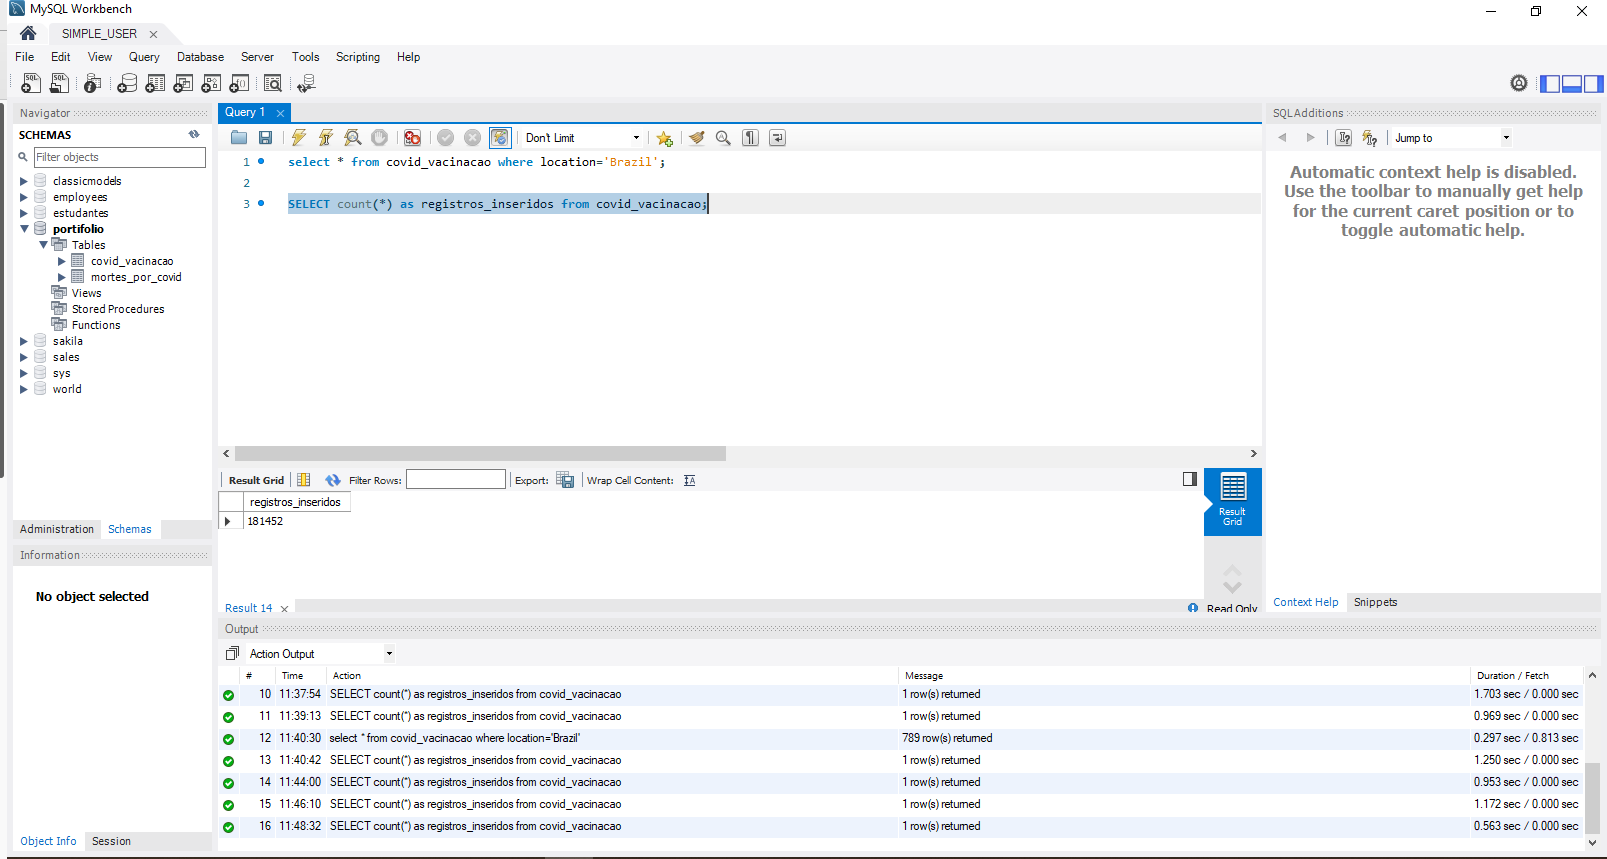

## ANALIZANDO DADOS DA TABELA covid_vacinacao e mortes_por_covid

In [25]:
sql = "select * from covid_vacinacao limit 10;"
pd.read_sql_query(sql,conn)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
1,AFG,Asia,Afghanistan,2020-02-25,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
2,AFG,Asia,Afghanistan,2020-02-26,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
3,AFG,Asia,Afghanistan,2020-02-27,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
4,AFG,Asia,Afghanistan,2020-02-28,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
5,AFG,Asia,Afghanistan,2020-02-29,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
6,AFG,Asia,Afghanistan,2020-03-01,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
7,AFG,Asia,Afghanistan,2020-03-02,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
8,AFG,Asia,Afghanistan,2020-03-03,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None
9,AFG,Asia,Afghanistan,2020-03-04,None,None,None,None,None,None,...,None,None,37746.0,0.5,64.83,0.511,None,None,None,None


In [31]:
# USA-SE DOCSTRING """ """ PARA QUE AS CONSULTAS SQL POSSAM SER EXTENDIDOS POR VÁRIAS LINHAS
sql = """select * 
        from covid_vacinacao as v
        join mortes_por_covid as m
            on v.location = m.location
            and v.date = m.date;"""
pd.read_sql_query(sql,conn)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181447,ZWE,Africa,Zimbabwe,2021-01-10,251048.0,4936.0,16634.00,0.327,3710.0,0.246,...,1202.000,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181448,ZWE,Africa,Zimbabwe,2021-06-23,614408.0,5716.0,40.71,0.379,3785.0,0.251,...,0.492,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181449,ZWE,Africa,Zimbabwe,2021-07-31,964353.0,5484.0,63898.00,0.363,9973.0,0.661,...,4562.000,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181450,ZWE,Africa,Zimbabwe,2021-08-18,1075390.0,5314.0,71255.00,0.352,6297.0,0.417,...,1798.000,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# POPULAÇÃO VACINADA NO MUNDO
sql = """select m.continent, m.location, m.date, m.population, v.new_vaccinations
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null
        order by 1, 2, 3;"""
pd.read_sql_query(sql,conn)

,continent,location,date,population,new_vaccinations
0,Africa,Algeria,2020-02-25,44616600.0,NaN
1,Africa,Algeria,2020-02-26,44616600.0,NaN
2,Africa,Algeria,2020-02-27,44616600.0,NaN
3,Africa,Algeria,2020-02-28,44616600.0,NaN
4,Africa,Algeria,2020-02-29,44616600.0,NaN
...,...,...,...,...,...
170841,South America,Venezuela,2022-04-20,28704900.0,NaN
170842,South America,Venezuela,2022-04-21,28704900.0,NaN
170843,South America,Venezuela,2022-04-22,28704900.0,NaN
170844,South America,Venezuela,2022-04-23,28704900.0,NaN


In [33]:
# POPULAÇÃO VACINADA NO MUNDO DE 01/01/2020 À 24/04/2022
# EXIBE OS 30 PRIMEIRO REGISTROS
sql = """select m.continent as continente, 
        m.location as país, 
        m.date as data, 
        m.population as população, 
        v.new_vaccinations as vacinação,
        sum(v.new_vaccinations) over (partition by m.location order by m.location, m.date) as cumulativoVacinados
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null
        order by 2, 3;"""
pd.read_sql_query(sql,conn).head(30)

,continente,país,data,população,vacinação,cumulativoVacinados
0,Asia,Afghanistan,2020-02-24,39835400.0,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835400.0,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835400.0,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835400.0,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835400.0,NaN,NaN
5,Asia,Afghanistan,2020-02-29,39835400.0,NaN,NaN
6,Asia,Afghanistan,2020-03-01,39835400.0,NaN,NaN
7,Asia,Afghanistan,2020-03-02,39835400.0,NaN,NaN
8,Asia,Afghanistan,2020-03-03,39835400.0,NaN,NaN
9,Asia,Afghanistan,2020-03-04,39835400.0,NaN,NaN


In [34]:
# EXIBE OS 20 ÚLTIMO REGISTROS
pd.read_sql_query(sql,conn).tail(20)

,continente,país,data,população,vacinação,cumulativoVacinados
170826,Africa,Zimbabwe,2022-04-05,15092200.0,37327.0,8685463.0
170827,Africa,Zimbabwe,2022-04-06,15092200.0,52125.0,8737588.0
170828,Africa,Zimbabwe,2022-04-07,15092200.0,25129.0,8762717.0
170829,Africa,Zimbabwe,2022-04-08,15092200.0,54400.0,8817117.0
170830,Africa,Zimbabwe,2022-04-09,15092200.0,66722.0,8883839.0
170831,Africa,Zimbabwe,2022-04-10,15092200.0,19222.0,8903061.0
170832,Africa,Zimbabwe,2022-04-11,15092200.0,18341.0,8921402.0
170833,Africa,Zimbabwe,2022-04-12,15092200.0,30548.0,8951950.0
170834,Africa,Zimbabwe,2022-04-13,15092200.0,8415.0,8960365.0
170835,Africa,Zimbabwe,2022-04-14,15092200.0,25718.0,8986083.0


In [ ]:
# CRIANDO UMA TABELA TEMPORÁRIA - drop temporary table if exists PercentualVacinadosAcumulativo
sql = """
create temporary table if not exists PercentualVacinadosAcumulativo
(
continente varchar(50),
país varchar(50),
data timestamp,
população numeric,
vacinação numeric,
VacinadosAcumulativo numeric
)

insert into PercentualVacinadosAcumulativo
select m.continent as continente, 
        m.location as país, 
        m.date as data, 
        m.population as população, 
        v.new_vaccinations as vacinação,
        sum(v.new_vaccinations) over (partition by m.location order by m.location, m.date) as VacinadosAcumulativo
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null;"""
pd.read_sql_query(sql,conn)

In [ ]:
# CRIANDO UMA TABELA CTE - common table explessions, NO MYSQL
sql = """
with PopvsVac ( continente, país, data, população, vacinação, VacinadosAcumulativo)
as
(
select m.continent as continente, 
        m.location as país, 
        m.date as data, 
        m.population as população, 
        v.new_vaccinations as vacinação,
        sum(v.new_vaccinations) over (partition by m.location order by m.location, m.date) as VacinadosAcumulativo
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null
)
select *
from PopvsVac;"""
pd.read_sql_query(sql,conn)

In [ ]:
# -- CRIAR VIEW NO MYSQL
sql = """
CREATE VIEW PercentualVacinadosAcumulativo AS select 
        m.continent as continente, 
        m.location as país, 
        m.date as data, 
        m.population as população, 
        v.new_vaccinations as vacinação,
        sum(v.new_vaccinations) over (partition by m.location order by m.location, m.date) as VacinadosAcumulativo
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null;"""
pd.read_sql_query(sql,conn)

In [ ]:
sql = """
CREATE VIEW PopvsVac AS select 
        m.continent as continente, 
        m.location as país, 
        m.date as data, 
        m.population as população, 
        v.new_vaccinations as vacinação,
        sum(v.new_vaccinations) over (partition by m.location order by m.location, m.date) as VacinadosAcumulativo
        from covid_vacinacao as v
        join mortes_por_covid as m
            on m.location = v.location
            and m.date = v.date
        where m.continent is not null;
"""
pd.read_sql_query(sql,conn)

In [39]:
# SELECIONANDO DADOS DE UMA VIEW
sql = """select país,
         população, 
         vacinação
         from PopvsVac
        order by 1, 2;"""
pd.read_sql_query(sql,conn).head(20)

,país,população,vacinação
0,Afghanistan,39835400.0,NaN
1,Afghanistan,39835400.0,NaN
2,Afghanistan,39835400.0,NaN
3,Afghanistan,39835400.0,NaN
4,Afghanistan,39835400.0,NaN
5,Afghanistan,39835400.0,NaN
6,Afghanistan,39835400.0,NaN
7,Afghanistan,39835400.0,NaN
8,Afghanistan,39835400.0,NaN
9,Afghanistan,39835400.0,NaN


In [40]:
sql = """select país,
         população, 
         vacinação
         from PopvsVac
        order by 1, 2;"""
pd.read_sql_query(sql,conn).tail(10)

,país,população,vacinação
170836,Zimbabwe,15092200.0,15431.0
170837,Zimbabwe,15092200.0,13333.0
170838,Zimbabwe,15092200.0,8069.0
170839,Zimbabwe,15092200.0,7169.0
170840,Zimbabwe,15092200.0,17092.0
170841,Zimbabwe,15092200.0,NaN
170842,Zimbabwe,15092200.0,NaN
170843,Zimbabwe,15092200.0,15020.0
170844,Zimbabwe,15092200.0,15675.0
170845,Zimbabwe,15092200.0,NaN


In [41]:
sql = """select *
         from PopvsVac
         limit 10;"""
pd.read_sql_query(sql,conn)

,continente,país,data,população,vacinação,VacinadosAcumulativo
0,Asia,Afghanistan,2020-02-24,39835400.0,None,None
1,Asia,Afghanistan,2020-02-25,39835400.0,None,None
2,Asia,Afghanistan,2020-02-26,39835400.0,None,None
3,Asia,Afghanistan,2020-02-27,39835400.0,None,None
4,Asia,Afghanistan,2020-02-28,39835400.0,None,None
5,Asia,Afghanistan,2020-02-29,39835400.0,None,None
6,Asia,Afghanistan,2020-03-01,39835400.0,None,None
7,Asia,Afghanistan,2020-03-02,39835400.0,None,None
8,Asia,Afghanistan,2020-03-03,39835400.0,None,None
9,Asia,Afghanistan,2020-03-04,39835400.0,None,None


In [42]:
# CUMULATIVO DE VACINAS APLICADAS NA POPULAÇÃO CUJO NOME DO PAIS COMECE EM BRA E QUE JÁ TENHA MAIS DE 1000 VACINAS APLICADAS
sql = """select *,(VacinadosAcumulativo/população)*100 as 'percentual da população vacinada'
         from PopvsVac
         where VacinadosAcumulativo > 1000
         and país like '%Bra%'
         limit 1000;"""
pd.read_sql_query(sql,conn)

,continente,país,data,população,vacinação,VacinadosAcumulativo,percentual da população vacinada
0,South America,Brazil,2021-01-19,213993000.0,12418.0,13415.0,0.006269
1,South America,Brazil,2021-01-20,213993000.0,92297.0,105712.0,0.049400
2,South America,Brazil,2021-01-21,213993000.0,87875.0,193587.0,0.090464
3,South America,Brazil,2021-01-22,213993000.0,268570.0,462157.0,0.215968
4,South America,Brazil,2021-01-23,213993000.0,110999.0,573156.0,0.267838
...,...,...,...,...,...,...,...
925,Europe,Gibraltar,2022-04-20,33691.0,NaN,92234.0,273.764507
926,Europe,Gibraltar,2022-04-21,33691.0,NaN,92234.0,273.764507
927,Europe,Gibraltar,2022-04-22,33691.0,NaN,92234.0,273.764507
928,Europe,Gibraltar,2022-04-23,33691.0,NaN,92234.0,273.764507


In [43]:
sql = """select *,(VacinadosAcumulativo/população)*100 as 'percentual da população vacinada'
         from PopvsVac
         where VacinadosAcumulativo > 1000
         and país like '%Bra%'
         and data between '2022-01-01' and '2022-04-25'
         limit 1000;"""
pd.read_sql_query(sql,conn)

,continente,país,data,população,vacinação,VacinadosAcumulativo,percentual da população vacinada
0,South America,Brazil,2022-01-01,213993000.0,18349.0,330754660.0,154.562990
1,South America,Brazil,2022-01-02,213993000.0,43567.0,330798227.0,154.583349
2,South America,Brazil,2022-01-03,213993000.0,740992.0,331539219.0,154.929618
3,South America,Brazil,2022-01-04,213993000.0,826514.0,332365733.0,155.315851
4,South America,Brazil,2022-01-05,213993000.0,724543.0,333090276.0,155.654433
...,...,...,...,...,...,...,...
223,Europe,Gibraltar,2022-04-20,33691.0,NaN,92234.0,273.764507
224,Europe,Gibraltar,2022-04-21,33691.0,NaN,92234.0,273.764507
225,Europe,Gibraltar,2022-04-22,33691.0,NaN,92234.0,273.764507
226,Europe,Gibraltar,2022-04-23,33691.0,NaN,92234.0,273.764507


In [44]:
# FECHANDO A CONEXÃO COM O SGBDR MYSQL
conn.close()